In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft2, ifft2, ifftshift, fftshift, dstn, idstn 

from classicalfield import FiniteTempGPE as gpe 

In [49]:
g = gpe( Nsamples = 1, Tfact = 1/50)

No vortices to be spawned
Total Imag Time:  54.9096245765686


In [50]:
g_f = gpe( Nsamples = 1, Tfact = 1/50, dst = False) # do the analysis below but with the thermal noise that uses the inverse fourier transform and compare

No vortices to be spawned
Total Imag Time:  53.49764966964722


Converting from momentum space => position space? 
Performing a Fourier transform on the inverse DST - should that give the noise spectrum back with 1/k^2 dependence 
Compare results to a different simulator?


Questions:: 
1) Root of the problem: 
- Performed an IDST on the thermal noise and then tried to recover the wavefunction using a FFT - maintains 1/k^2 dependence with the exception of a sudden uptick in the momenta in larger k values. This is also found in the simulation when the simulation starts to become unstable
     - Why is there a sudden uptick in the momenta at larger k values when I use the Fourier transform on the DST? 
2) Finding the coefficient for the noise, I calculated the coefficient for the IDST in the same way that the coefficient was calculated for the inverse FFT, but it came out with a sinusoidal dependence on k, so the 1/k^2 dependence will not be preserved after the correction. Is there an assumption I am making incorrectly? Otherwise, it seems like multiplying the original coefficient by 2 for the 2 in the DST type 1 definition seems to be working properly 


C:\Users\TQC User\AppData\Local\Temp\ipykernel_25920\1203418224.py:24: RuntimeWarning: divide by zero encountered in divide
  plt.plot(fftshift(g.ki[0][0]), fftshift(g.T/g.ki[0][0]**2), label = 'Avg Thermal Fluctuations (Theorized)', linewidth= 3, linestyle = '--')


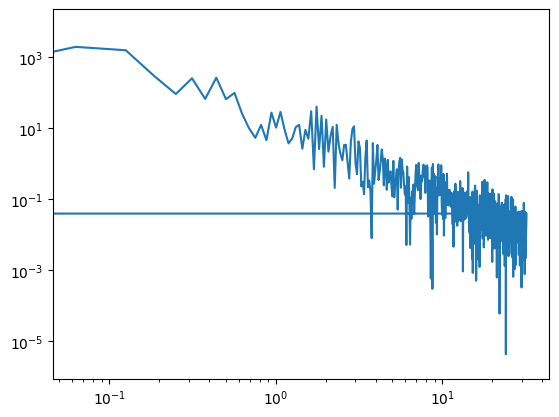

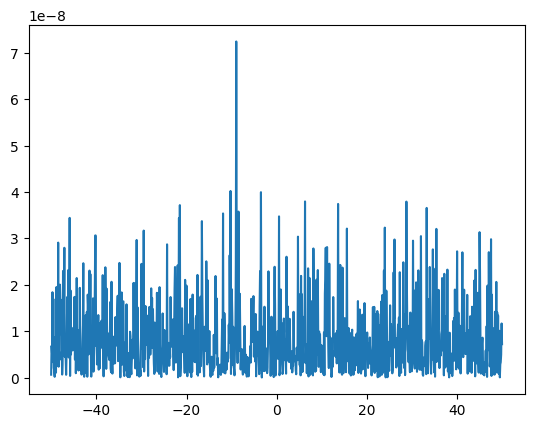

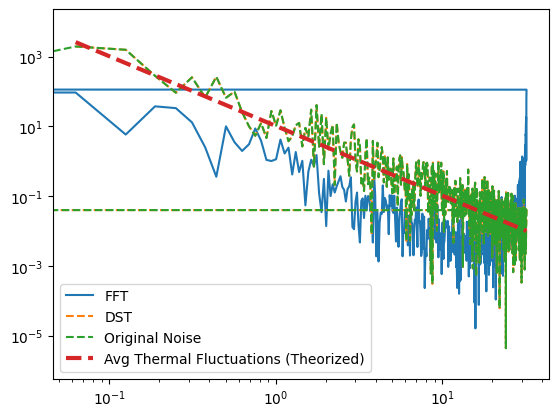

In [51]:
## test the new coefficient and see what the noise output looks like 

# create thermal wavefunctions as before 

thermal_noise_k = g.genPsiK() 
thermal_noise_x = idstn(thermal_noise_k, type = 1)

plt.figure() 
plt.plot(g.ki[0][0], np.abs(thermal_noise_k[0])**2)
plt.yscale('log')
plt.xscale('log')

# plot the thermal noise in position space 
plt.figure() 
plt.plot(g.xi[0][0], np.abs(thermal_noise_x[0])**2)

# now do the Fourier transform to revert back 
thermal_noise_k_fft = fft2(thermal_noise_x)
thermal_noise_k_dst = dstn(thermal_noise_x, type = 1)
plt.figure() 
plt.plot(g.ki[0][0], np.abs(thermal_noise_k_fft[0])**2, label = 'FFT')
plt.plot(g.ki[0][0][1:], np.abs(thermal_noise_k_dst[0][1:])**2, linestyle = '--', label = 'DST')
plt.plot(g.ki[0][0], np.abs(thermal_noise_k[0])**2, linestyle = '--', label = 'Original Noise')
plt.plot(fftshift(g.ki[0][0]), fftshift(g.T/g.ki[0][0]**2), label = 'Avg Thermal Fluctuations (Theorized)', linewidth= 3, linestyle = '--')
plt.yscale('log') 
plt.xscale('log')
plt.legend() 

# plt.figure() 
# plt.imshow(np.abs(thermal_noise_x)**2)
# plt.colorbar() 

C:\Users\TQC User\AppData\Local\Temp\ipykernel_25920\2750465034.py:24: RuntimeWarning: divide by zero encountered in divide
  plt.plot(fftshift(g.ki[0][0]), fftshift(g.T/g.ki[0][0]**2), label = 'Avg Thermal Fluctuations (Theorized)', linewidth= 3, linestyle = '--')


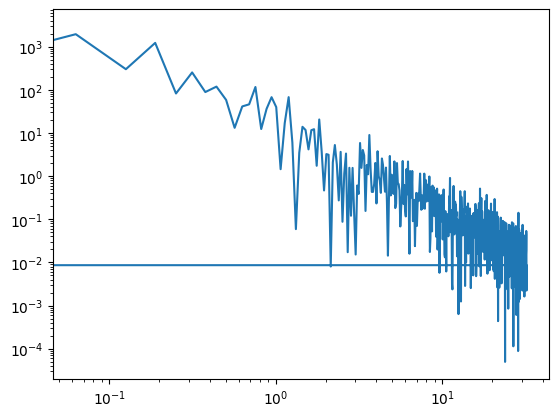

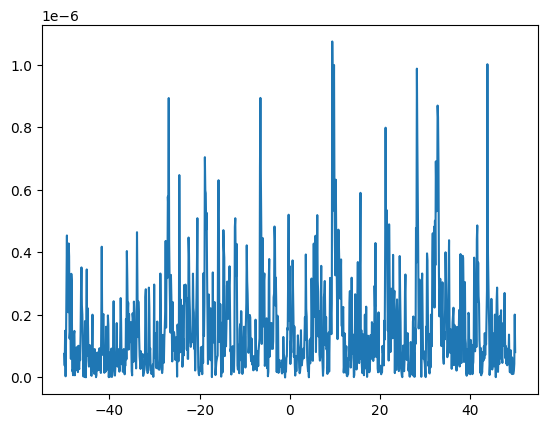

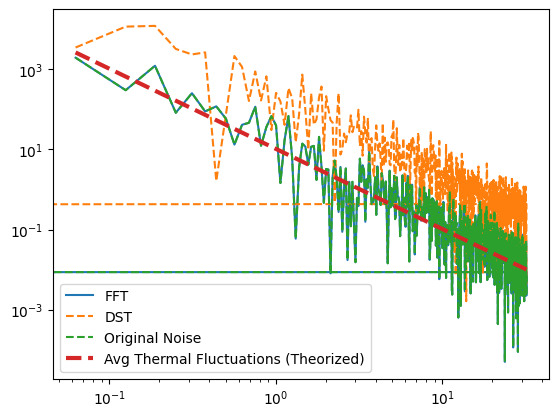

In [52]:
## test the new coefficient and see what the noise output looks like 

# create thermal wavefunctions as before 

thermal_noise_k = g_f.genPsiK() 
thermal_noise_x = ifft2(thermal_noise_k)

plt.figure() 
plt.plot(g.ki[0][0], np.abs(thermal_noise_k[0])**2)
plt.yscale('log')
plt.xscale('log')

# plot the thermal noise in position space 
plt.figure() 
plt.plot(g.xi[0][0], np.abs(thermal_noise_x[0])**2)

# now do the Fourier transform to revert back 
thermal_noise_k_fft = fft2(thermal_noise_x)
thermal_noise_k_dst = dstn(thermal_noise_x, type = 1)
plt.figure() 
plt.plot(g.ki[0][0][1:], np.abs(thermal_noise_k_fft[0][1:])**2, label = 'FFT')
plt.plot(g.ki[0][0][1:], np.abs(thermal_noise_k_dst[0][1:])**2, label = 'DST', linestyle = '--')
plt.plot(g.ki[0][0][1:], np.abs(thermal_noise_k[0][1:])**2, label = 'Original Noise', linestyle = '--')
plt.plot(fftshift(g.ki[0][0]), fftshift(g.T/g.ki[0][0]**2), label = 'Avg Thermal Fluctuations (Theorized)', linewidth= 3, linestyle = '--')
plt.yscale('log') 
plt.xscale('log')
plt.legend() 

# plt.figure() 
# plt.imshow(np.abs(thermal_noise_x)**2)
# plt.colorbar() 

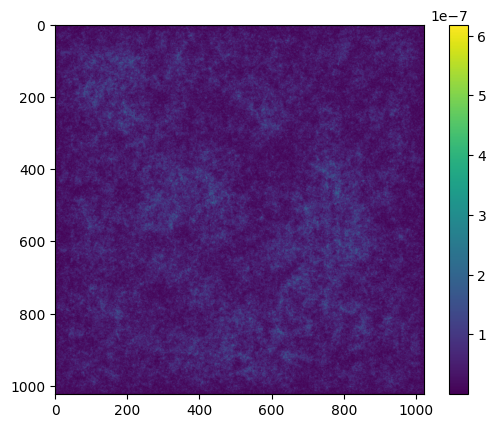

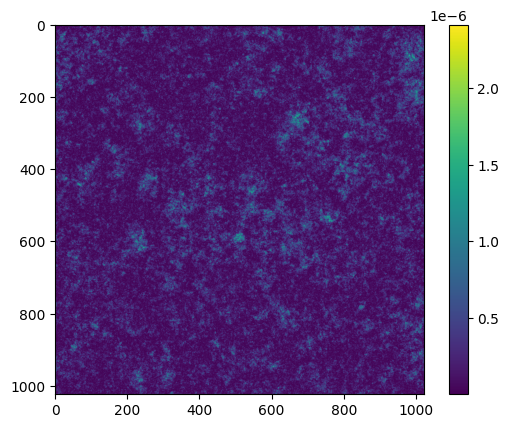

In [53]:
plt.figure() 
plt.imshow(np.abs(idstn(thermal_noise_k, type = 1))**2)
plt.colorbar() 

plt.figure() 
plt.imshow(np.abs(ifft2(thermal_noise_k))**2)
plt.colorbar() 

### Finding the coefficient for the noise 

How does the inverse DST relate to the DST? Find a correlation and then convert the coefficient appropriately! 

In [69]:
# the coefficient for the scipy IFFT function was 
coef = g.winL/g.dx**2 

# a possible candidate for the coefficient for the scipy IDST function is 
coef_dst = 2/g.winL 

print(coef) 
print(coef_dst)

# these are not similar... I'm not sure how to know when I have the right coefficient.... I guess

10485.76
2048.0


C:\Users\TQC User\AppData\Local\Temp\ipykernel_25920\4138334388.py:21: RuntimeWarning: divide by zero encountered in divide
  plt.plot(fftshift(g.ki[0][0]), fftshift(4*coef**2*g.T/g.ki[0][0]**2), label = 'Avg Thermal Fluctuations (Theorized)', linewidth= 3, linestyle = '--')
C:\Users\TQC User\AppData\Local\Temp\ipykernel_25920\4138334388.py:30: RuntimeWarning: divide by zero encountered in divide
  plt.plot(fftshift(g.ki[0][0]), fftshift(coef**2*g.T/g.ki[0][0]**2), label = 'Avg Thermal Fluctuations (Theorized)', linewidth= 3, linestyle = '--')


Text(0.5, 1.0, 'Momentum Space: Comparisons between DST and FFT on IFFT converted thermal noise')

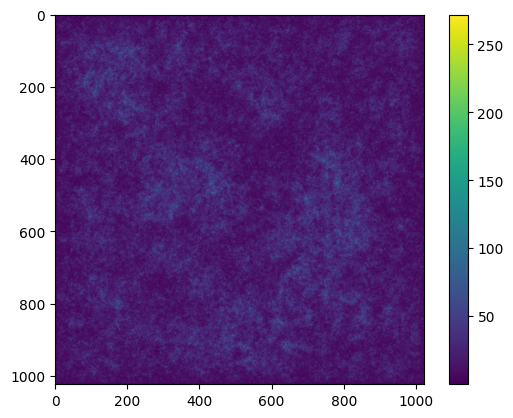

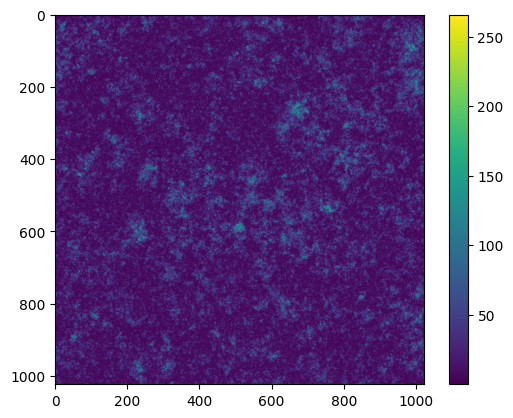

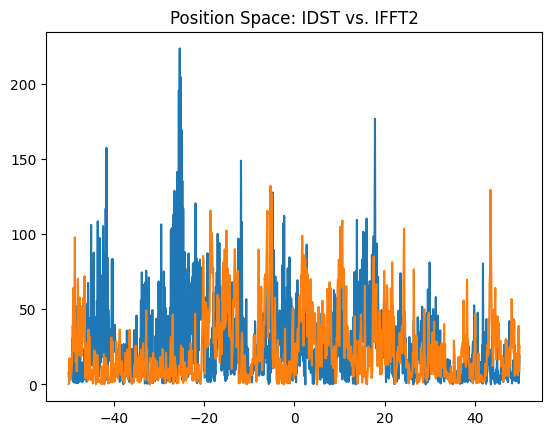

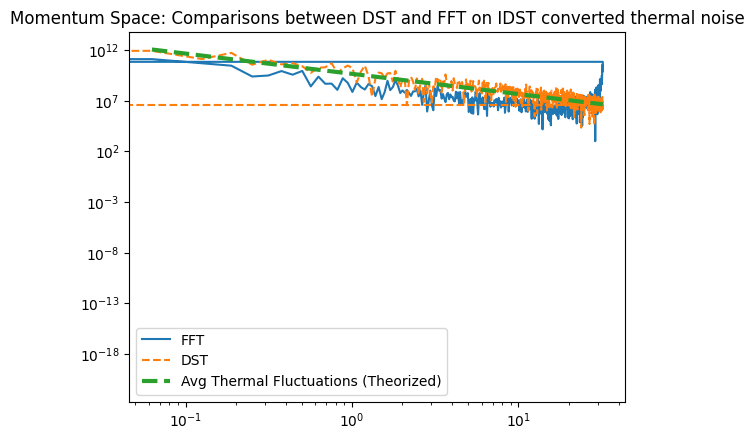

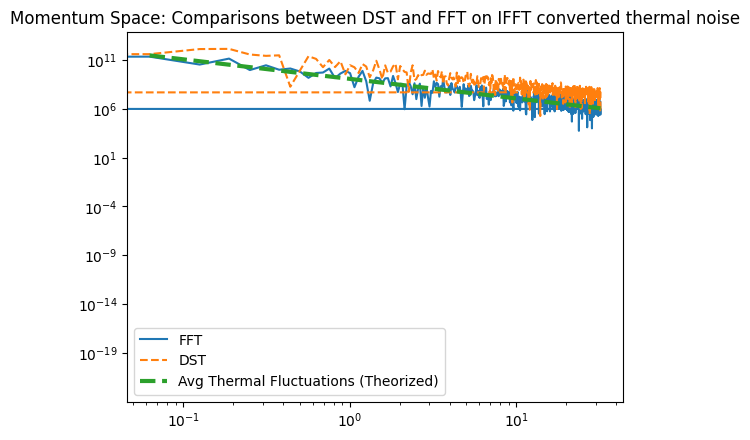

In [71]:
plt.figure() 
plt.imshow(np.abs(idstn(2*coef*thermal_noise_k, type = 1))**2)
plt.colorbar() 

plt.figure() 
plt.imshow(np.abs(ifft2(coef*thermal_noise_k))**2)
plt.colorbar()

# plot a slice 
plt.figure() 
plt.plot(g.xi[0][0], np.abs(idstn(2*coef*thermal_noise_k, type = 1))[len(thermal_noise_k)//2]**2, label = 'IDST')
plt.plot(g.xi[0][0], np.abs(ifft2(coef*thermal_noise_k))[len(thermal_noise_k)//2]**2, label = 'IFFT')
plt.title('Position Space: IDST vs. IFFT2')

xspace_dst = idstn(2*coef*thermal_noise_k, type = 1)
xspace_fft = ifft2(coef*thermal_noise_k)
# convert back to momentum space
plt.figure() 
plt.plot(g.ki[0][0], np.abs(fft2(xspace_dst))[0]**2, label = 'FFT')
plt.plot(g.ki[0][0], np.abs(dstn(xspace_dst, type = 1))[0]**2, linestyle = '--', label = 'DST')
plt.plot(fftshift(g.ki[0][0]), fftshift(4*coef**2*g.T/g.ki[0][0]**2), label = 'Avg Thermal Fluctuations (Theorized)', linewidth= 3, linestyle = '--')
plt.legend()
plt.xscale('log')
plt.yscale('log')
plt.title('Momentum Space: Comparisons between DST and FFT on IDST converted thermal noise')

plt.figure() 
plt.plot(g.ki[0][0], np.abs(fft2(xspace_fft))[0]**2, label = 'FFT')
plt.plot(g.ki[0][0], np.abs(dstn(xspace_fft, type = 1))[0]**2, linestyle = '--', label = 'DST')
plt.plot(fftshift(g.ki[0][0]), fftshift(coef**2*g.T/g.ki[0][0]**2), label = 'Avg Thermal Fluctuations (Theorized)', linewidth= 3, linestyle = '--')
plt.legend()
plt.xscale('log')
plt.yscale('log')
plt.title('Momentum Space: Comparisons between DST and FFT on IFFT converted thermal noise')

C:\Users\TQC User\AppData\Local\Temp\ipykernel_25920\2328744268.py:6: RuntimeWarning: divide by zero encountered in divide
  plt.plot(fftshift(g.ki[0][0]), fftshift(4*coef**2*g.T/g.ki[0][0]**2), label = 'Avg Thermal Fluctuations (Theorized)', linewidth= 3, linestyle = '--')
C:\Users\TQC User\AppData\Local\Temp\ipykernel_25920\2328744268.py:15: RuntimeWarning: divide by zero encountered in divide
  plt.plot(fftshift(g.ki[0][0]), fftshift(coef**2*g.T/g.ki[0][0]**2), label = 'Avg Thermal Fluctuations (Theorized)', linewidth= 3, linestyle = '--')


Text(0.5, 1.0, 'Momentum Space: Comparisons between DST and FFT on IFFT converted thermal noise')

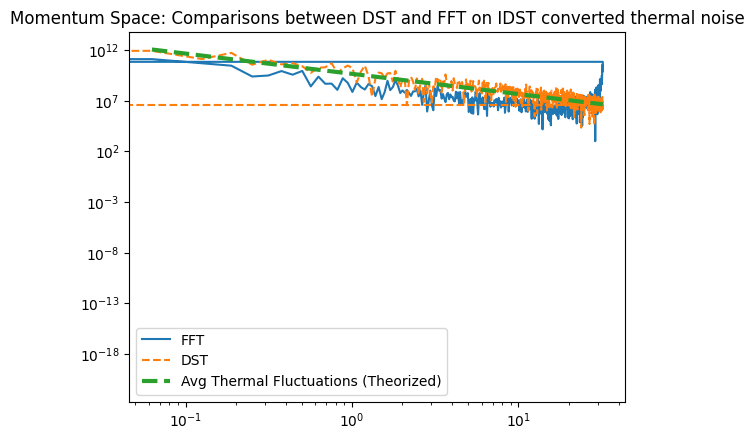

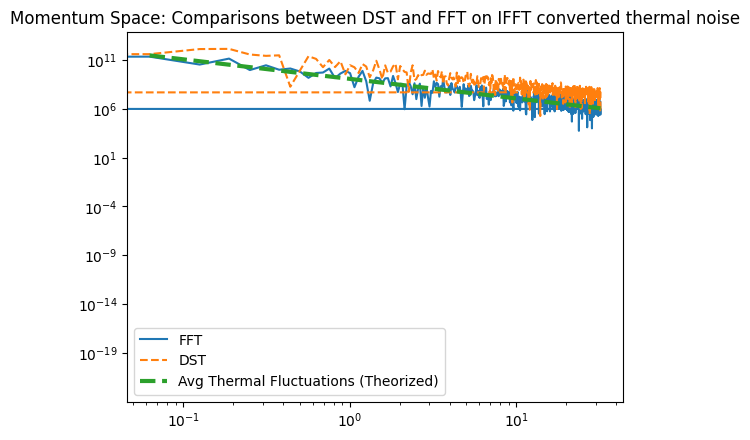

In [76]:
# the following code is copy and pasted from above 
# convert back to momentum space
plt.figure() 
plt.plot(g.ki[0][0], np.abs(fft2(xspace_dst))[0]**2, label = 'FFT')
plt.plot(g.ki[0][0], np.abs(dstn(xspace_dst, type = 1))[0]**2, linestyle = '--', label = 'DST')
plt.plot(fftshift(g.ki[0][0]), fftshift(4*coef**2*g.T/g.ki[0][0]**2), label = 'Avg Thermal Fluctuations (Theorized)', linewidth= 3, linestyle = '--')
plt.legend()
plt.xscale('log')
plt.yscale('log')
plt.title('Momentum Space: Comparisons between DST and FFT on IDST converted thermal noise')

plt.figure() 
plt.plot(g.ki[0][0], np.abs(fft2(xspace_fft))[0]**2, label = 'FFT')
plt.plot(g.ki[0][0], np.abs(dstn(xspace_fft, type = 1))[0]**2, linestyle = '--', label = 'DST')
plt.plot(fftshift(g.ki[0][0]), fftshift(coef**2*g.T/g.ki[0][0]**2), label = 'Avg Thermal Fluctuations (Theorized)', linewidth= 3, linestyle = '--')
plt.legend()
plt.xscale('log')
plt.yscale('log')
plt.title('Momentum Space: Comparisons between DST and FFT on IFFT converted thermal noise')

Conclusion: the issue at the moment is caused by the Fourier transform creating an uptick in the momentum curve after the IDST is applied to the thermal noise. This uptick causes instability in the simulation 